In [ ]:
#!pip install geopandas, folium, geocoder, geopy

# Geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Cargar el mapa
mapa = gpd.read_file('data/provincias.geojson')
mapa.head(10)

,NAME_1,NAME_2,CC_2,geometry
0,Andalucía,Almería,04,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,Andalucía,Jaén,23,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,Andalucía,Málaga,29,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,Andalucía,Sevilla,41,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."
8,Aragón,Huesca,22,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4..."
9,Aragón,Teruel,44,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7..."


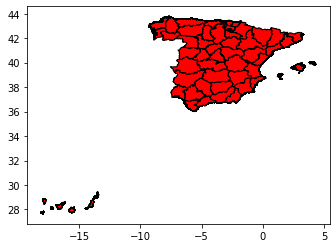

In [5]:
mapa.plot(color='red', edgecolor='black')

In [6]:
natalidad = pd.read_csv('data/natalidad.csv')
natalidad.head()

,NAME,NATALIDAD
0,Almería,10.48
1,Cádiz,8.11
2,Córdoba,7.90
3,Granada,7.78
4,Huelva,7.57


In [7]:
mapa_data = pd.merge(mapa, natalidad, left_on='NAME_2', right_on='NAME')

In [8]:
mapa_data

,NAME_1,NAME_2,CC_2,geometry,NAME,NATALIDAD
0,Andalucía,Almería,04,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",Almería,10.48
1,Andalucía,Cádiz,11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",Cádiz,8.11
2,Andalucía,Córdoba,14,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",Córdoba,7.90
3,Andalucía,Granada,18,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",Granada,7.78
4,Andalucía,Huelva,21,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",Huelva,7.57
5,Andalucía,Jaén,23,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",Jaén,7.68
6,Andalucía,Málaga,29,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",Málaga,8.14
7,Andalucía,Sevilla,41,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",Sevilla,8.71
8,Aragón,Huesca,22,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...",Huesca,7.51
9,Aragón,Teruel,44,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...",Teruel,7.10


(-10.0, 5.0, 35.0, 45.0)

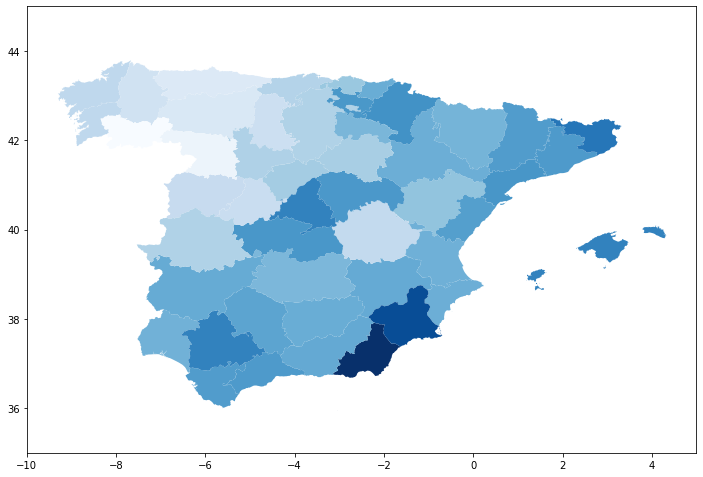

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
mapa_data.plot(column='NATALIDAD', cmap='Blues', ax=ax)
ax.axis([-10, 5, 35, 45])

In [18]:
mapa_puntos = mapa_data.copy()
mapa_puntos.geometry = mapa.geometry.centroid

In [19]:
mapa_puntos.head()

,NAME_1,NAME_2,CC_2,geometry,NAME,NATALIDAD
0,Andalucía,Almería,04,POINT (-2.34478 37.19599),Almería,10.48
1,Andalucía,Cádiz,11,POINT (-5.75994 36.55419),Cádiz,8.11
2,Andalucía,Córdoba,14,POINT (-4.80914 37.99269),Córdoba,7.90
3,Andalucía,Granada,18,POINT (-3.26777 37.31251),Granada,7.78
4,Andalucía,Huelva,21,POINT (-6.82843 37.57883),Huelva,7.57


(-10.0, 5.0, 35.0, 45.0)

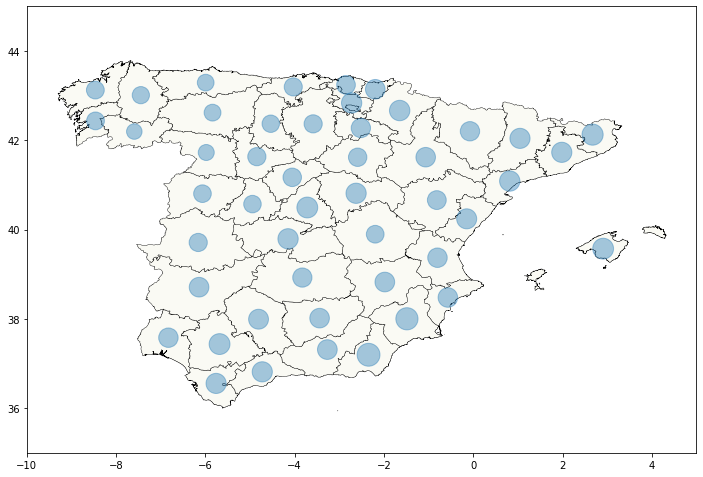

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
mapa.plot(color='#FAFAF4', ax=ax, edgecolor='black', linewidth=0.4)
mapa_puntos['size'] = mapa_puntos['NATALIDAD'] * 50
mapa_puntos.plot(ax=ax, markersize='size', alpha=0.4)
ax.axis([-10, 5, 35, 45])